In [1]:
!rm /App/output/aggregated_0.csv
!rm -rf /App/output/train_0

rm: cannot remove '/App/output/aggregated_0.csv': No such file or directory


## Create blank weights file

In [2]:
!python /App/offline_agent/generateBlankWeights.py

Using TensorFlow backend.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
activation_3 (Activation)    (None, 2)            

In [3]:
!mv blank_weights.h5f /App/offline_agent

## Learning phase

### RTT scheduler

In [4]:
%%bash

cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4465.51
Serving new connection: 79da63a6b45d2d6c, version 512 from 10.0.0.1:47460
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of 79da63a6b45d2d6c
Path 0: sent 7 retrans 1 lost 0; rcv 6 rtt 673.464ms
Congestion Window: 46720
Path 3: sent 1193 retrans 0 lost 0; rcv 581 rtt 147.958ms
Congestion Window: 90520
Path 1: sent 454 retrans 0 lost 0; rcv 212 rtt 596.687ms
Congestion Window: 124100


*** Error setting resource limits. Mininet's performance may be affected.


### Blank DQNAgent

In [5]:
%%bash

cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/offline_agent/blank_weights.h5f --rtt 0 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4838.00
Serving new connection: 34b04c6612c70065, version 512 from 10.0.0.1:57792
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of 34b04c6612c70065
Path 0: sent 293 retrans 1 lost 0; rcv 122 rtt 492.675ms
Congestion Window: 73000
Path 3: sent 601 retrans 0 lost 0; rcv 270 rtt 345.862ms
Congestion Window: 115340
Path 1: sent 780 retrans 8 lost 0; rcv 342 rtt 479.783ms
Congestion Window: 208780


*** Error setting resource limits. Mininet's performance may be affected.


### Train

In [6]:
!/App/mininettest/scripts/train_tcp.bash 0 100000 0

0,100000,0
rm: cannot remove '/App/mininettest/weight*.h5f': No such file or directory
rm: cannot remove '/App/output/*.csv': No such file or directory
rm: cannot remove '/App/output/aggregated_0.csv': No such file or directory
0/100000 using /App/offline_agent/blank_weights.h5f with epsilon=.90
*** Error setting resource limits. Mininet's performance may be affected.
108
*** Error setting resource limits. Mininet's performance may be affected.
201
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = set

2783
*** Error setting resource limits. Mininet's performance may be affected.
2871
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo

4644
*** Error setting resource limits. Mininet's performance may be affected.
4823
*** Error setting resource limits. Mininet's performance may be affected.
4906
*** Error setting resource limits. Mininet's performance may be affected.
5020
*** Error setting resource limits. Mininet's performance may be affected.
5210
*** Error setting resource limits. Mininet's performance may be affected.
5320
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.p

604
*** Error setting resource limits. Mininet's performance may be affected.
715
*** Error setting resource limits. Mininet's performance may be affected.
823
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-pa

Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo )
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 431, in buildFromTopo
    self.addLink( **params )
  File "/usr/lib/python2.7/dist-packages/

*** Error setting resource limits. Mininet's performance may be affected.
4640
*** Error setting resource limits. Mininet's performance may be affected.
4739
*** Error setting resource limits. Mininet's performance may be affected.
4823
*** Error setting resource limits. Mininet's performance may be affected.
4925
*** Error setting resource limits. Mininet's performance may be affected.
5098
*** Error setting resource limits. Mininet's performance may be affected.
5294
*** Error setting resource limits. Mininet's performance may be affected.
5392
*** Error setting resource limits. Mininet's performance may be affected.
5400
*** Error setting resource limits. Mininet's performance may be affected.
5644
*** Error setting resource limits. Mininet's performance may be affected.
5763
*** Error setting resource limits. Mininet's performance may be affected.
5865
*** Error setting resource limits. Mininet's performance may be affected.
5962
*** Error setting resource limits. Mininet's perform

*** Error setting resource limits. Mininet's performance may be affected.
1107
*** Error setting resource limits. Mininet's performance may be affected.
1195
*** Error setting resource limits. Mininet's performance may be affected.
1287
*** Error setting resource limits. Mininet's performance may be affected.
1482
*** Error setting resource limits. Mininet's performance may be affected.
1484
*** Error setting resource limits. Mininet's performance may be affected.
1784
*** Error setting resource limits. Mininet's performance may be affected.
1876
*** Error setting resource limits. Mininet's performance may be affected.
2141
*** Error setting resource limits. Mininet's performance may be affected.
2243
*** Error setting resource limits. Mininet's performance may be affected.
2338
*** Error setting resource limits. Mininet's performance may be affected.
2449
*** Error setting resource limits. Mininet's performance may be affected.
2623
*** Error setting resource limits. Mininet's perform

*** Error setting resource limits. Mininet's performance may be affected.
5191
*** Error setting resource limits. Mininet's performance may be affected.
5333
*** Error setting resource limits. Mininet's performance may be affected.
5416
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.p

2018-12-28 18:10:45.635171: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
Training for 18053 steps ...
Interval 1 (0 steps performed)
18048/50000 [=========>....................] - ETA: 2:18 - reward: -0.9142done, took 78.071 seconds
18219/100000 using /App/mininettest/weights_18053_steps.h5f with epsilon=.76
*** Error setting resource limits. Mininet's performance may be affected.
101
*** Error setting resource limits. Mininet's performance may be affected.
103
*** Error setting resource limits. Mininet's performance may be affected.
292
*** Error setting resource limits. Mininet's performance may be affected.
390
*** Error setting resource limits. Mininet's performance may be affected.
506
*** Error setting resource limits. Mininet's performance may be affected.
605
*** Error setting resource limits. Mininet's performance may be affected.
782
*** Error setting resource limits. Mininet's pe

*** Error setting resource limits. Mininet's performance may be affected.
1596
*** Error setting resource limits. Mininet's performance may be affected.
1694
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-pack

*** Error setting resource limits. Mininet's performance may be affected.
3509
*** Error setting resource limits. Mininet's performance may be affected.
3512
*** Error setting resource limits. Mininet's performance may be affected.
3610
*** Error setting resource limits. Mininet's performance may be affected.
3729
*** Error setting resource limits. Mininet's performance may be affected.
3839
*** Error setting resource limits. Mininet's performance may be affected.
3954
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, i

5890
*** Error setting resource limits. Mininet's performance may be affected.
6053
Traceback (most recent call last):
  File "/App/mininettest/summary.py", line 17, in <module>
    print_summary(args.line)
  File "/App/mininettest/summary.py", line 5, in print_summary
    throughput, state, _ = line.split(",")
ValueError: too many values to unpack
Using TensorFlow backend.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_____________________________

2145
*** Error setting resource limits. Mininet's performance may be affected.
2278
*** Error setting resource limits. Mininet's performance may be affected.
2382
*** Error setting resource limits. Mininet's performance may be affected.
2495
*** Error setting resource limits. Mininet's performance may be affected.
2608
*** Error setting resource limits. Mininet's performance may be affected.
2707
*** Error setting resource limits. Mininet's performance may be affected.
2780
*** Error setting resource limits. Mininet's performance may be affected.
2878
*** Error setting resource limits. Mininet's performance may be affected.
2985
*** Error setting resource limits. Mininet's performance may be affected.
3079
*** Error setting resource limits. Mininet's performance may be affected.
3229
*** Error setting resource limits. Mininet's performance may be affected.
3331
*** Error setting resource limits. Mininet's performance may be affected.
3426
*** Error setting resource limits. Mininet's pe

*** Error setting resource limits. Mininet's performance may be affected.
5185
*** Error setting resource limits. Mininet's performance may be affected.
5281
*** Error setting resource limits. Mininet's performance may be affected.
5390
*** Error setting resource limits. Mininet's performance may be affected.
5469
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVS

*** Error setting resource limits. Mininet's performance may be affected.
324
*** Error setting resource limits. Mininet's performance may be affected.
546
*** Error setting resource limits. Mininet's performance may be affected.
710
*** Error setting resource limits. Mininet's performance may be affected.
807
*** Error setting resource limits. Mininet's performance may be affected.
911
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8

2338
*** Error setting resource limits. Mininet's performance may be affected.
2441
*** Error setting resource limits. Mininet's performance may be affected.
2538
*** Error setting resource limits. Mininet's performance may be affected.
2638
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/

*** Error setting resource limits. Mininet's performance may be affected.
4741
*** Error setting resource limits. Mininet's performance may be affected.
4837
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-pack

796
*** Error setting resource limits. Mininet's performance may be affected.
903
*** Error setting resource limits. Mininet's performance may be affected.
1138
*** Error setting resource limits. Mininet's performance may be affected.
1254
*** Error setting resource limits. Mininet's performance may be affected.
1377
*** Error setting resource limits. Mininet's performance may be affected.
1562
*** Error setting resource limits. Mininet's performance may be affected.
1705
*** Error setting resource limits. Mininet's performance may be affected.
1928
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_

*** Error setting resource limits. Mininet's performance may be affected.
5019
*** Error setting resource limits. Mininet's performance may be affected.
5345
*** Error setting resource limits. Mininet's performance may be affected.
5444
*** Error setting resource limits. Mininet's performance may be affected.
5449
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVS

*** Error setting resource limits. Mininet's performance may be affected.
557
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo )
  F

3732
*** Error setting resource limits. Mininet's performance may be affected.
3844
*** Error setting resource limits. Mininet's performance may be affected.
4078
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist

*** Error setting resource limits. Mininet's performance may be affected.
1330
*** Error setting resource limits. Mininet's performance may be affected.
1424
*** Error setting resource limits. Mininet's performance may be affected.
1627
*** Error setting resource limits. Mininet's performance may be affected.
1723
*** Error setting resource limits. Mininet's performance may be affected.
1897
*** Error setting resource limits. Mininet's performance may be affected.
2004
*** Error setting resource limits. Mininet's performance may be affected.
2184
*** Error setting resource limits. Mininet's performance may be affected.
2412
*** Error setting resource limits. Mininet's performance may be affected.
2421
*** Error setting resource limits. Mininet's performance may be affected.
2522
*** Error setting resource limits. Mininet's performance may be affected.
2643
*** Error setting resource limits. Mininet's performance may be affected.
2647
*** Error setting resource limits. Mininet's perform

655
*** Error setting resource limits. Mininet's performance may be affected.
778
*** Error setting resource limits. Mininet's performance may be affected.
1016
*** Error setting resource limits. Mininet's performance may be affected.
1190
*** Error setting resource limits. Mininet's performance may be affected.
1276
*** Error setting resource limits. Mininet's performance may be affected.
1435
*** Error setting resource limits. Mininet's performance may be affected.
1664
*** Error setting resource limits. Mininet's performance may be affected.
1768
*** Error setting resource limits. Mininet's performance may be affected.
1861
*** Error setting resource limits. Mininet's performance may be affected.
1961
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/Ap

3830
*** Error setting resource limits. Mininet's performance may be affected.
3977
*** Error setting resource limits. Mininet's performance may be affected.
4085
*** Error setting resource limits. Mininet's performance may be affected.
4170
*** Error setting resource limits. Mininet's performance may be affected.
4273
*** Error setting resource limits. Mininet's performance may be affected.
4371
*** Error setting resource limits. Mininet's performance may be affected.
4567
*** Error setting resource limits. Mininet's performance may be affected.
4642
*** Error setting resource limits. Mininet's performance may be affected.
4735
*** Error setting resource limits. Mininet's performance may be affected.
4955
*** Error setting resource limits. Mininet's performance may be affected.
5065
*** Error setting resource limits. Mininet's performance may be affected.
5188
*** Error setting resource limits. Mininet's performance may be affected.
5303
*** Error setting resource limits. Mininet's pe

Interval 2 (50000 steps performed)
10213/50000 [=====>........................] - ETA: 3:14 - reward: -0.7735done, took 280.042 seconds
60726/100000 using /App/mininettest/weights_60217_steps.h5f with epsilon=.42
*** Error setting resource limits. Mininet's performance may be affected.
94
*** Error setting resource limits. Mininet's performance may be affected.
235
*** Error setting resource limits. Mininet's performance may be affected.
343
*** Error setting resource limits. Mininet's performance may be affected.
468
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  Fil

*** Error setting resource limits. Mininet's performance may be affected.
2317
*** Error setting resource limits. Mininet's performance may be affected.
2411
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-pack

2018-12-28 18:53:37.367833: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
Training for 66225 steps ...
Interval 1 (0 steps performed)
50000/50000 [==============================] - 244s 5ms/step - reward: -0.8580
429 episodes - episode_reward: -100.000 [-100.000, -100.000] - loss: 32.280 - mean_absolute_error: 2.650 - mean_q: 1.811 - mean_tau: 0.531

Interval 2 (50000 steps performed)
16219/50000 [========>.....................] - ETA: 2:45 - reward: -0.7830done, took 323.283 seconds
66782/100000 using /App/mininettest/weights_66225_steps.h5f with epsilon=.38
*** Error setting resource limits. Mininet's performance may be affected.
167
*** Error setting resource limits. Mininet's performance may be affected.
290
*** Error setting resource limits. Mininet's performance may be affected.
390
*** Error setting resource limits. Mininet's performance may be affected.
397
*** Error setting resource

*** Error setting resource limits. Mininet's performance may be affected.
3999
*** Error setting resource limits. Mininet's performance may be affected.
4117
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-pack

*** Error setting resource limits. Mininet's performance may be affected.
873
*** Error setting resource limits. Mininet's performance may be affected.
1070
*** Error setting resource limits. Mininet's performance may be affected.
1181
*** Error setting resource limits. Mininet's performance may be affected.
1364
*** Error setting resource limits. Mininet's performance may be affected.
1367
*** Error setting resource limits. Mininet's performance may be affected.
1373
*** Error setting resource limits. Mininet's performance may be affected.
1478
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test

*** Error setting resource limits. Mininet's performance may be affected.
3554
*** Error setting resource limits. Mininet's performance may be affected.
3657
*** Error setting resource limits. Mininet's performance may be affected.
3767
*** Error setting resource limits. Mininet's performance may be affected.
3870
*** Error setting resource limits. Mininet's performance may be affected.
4082
*** Error setting resource limits. Mininet's performance may be affected.
4196
*** Error setting resource limits. Mininet's performance may be affected.
4435
*** Error setting resource limits. Mininet's performance may be affected.
4565
*** Error setting resource limits. Mininet's performance may be affected.
4777
*** Error setting resource limits. Mininet's performance may be affected.
4890
*** Error setting resource limits. Mininet's performance may be affected.
5006
*** Error setting resource limits. Mininet's performance may be affected.
5249
*** Error setting resource limits. Mininet's perform

2578
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo )
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 431, in build

427
*** Error setting resource limits. Mininet's performance may be affected.
515
*** Error setting resource limits. Mininet's performance may be affected.
521
*** Error setting resource limits. Mininet's performance may be affected.
695
*** Error setting resource limits. Mininet's performance may be affected.
816
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVS

2683
*** Error setting resource limits. Mininet's performance may be affected.
2792
*** Error setting resource limits. Mininet's performance may be affected.
2964
*** Error setting resource limits. Mininet's performance may be affected.
3068
*** Error setting resource limits. Mininet's performance may be affected.
3293
*** Error setting resource limits. Mininet's performance may be affected.
3501
*** Error setting resource limits. Mininet's performance may be affected.
3643
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 

4682
*** Error setting resource limits. Mininet's performance may be affected.
4801
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo

*** Error setting resource limits. Mininet's performance may be affected.
279
*** Error setting resource limits. Mininet's performance may be affected.
386
*** Error setting resource limits. Mininet's performance may be affected.
566
*** Error setting resource limits. Mininet's performance may be affected.
647
*** Error setting resource limits. Mininet's performance may be affected.
740
*** Error setting resource limits. Mininet's performance may be affected.
849
*** Error setting resource limits. Mininet's performance may be affected.
959
*** Error setting resource limits. Mininet's performance may be affected.
1070
*** Error setting resource limits. Mininet's performance may be affected.
1157
*** Error setting resource limits. Mininet's performance may be affected.
1356
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile,

3918
*** Error setting resource limits. Mininet's performance may be affected.
4017
*** Error setting resource limits. Mininet's performance may be affected.
4110
*** Error setting resource limits. Mininet's performance may be affected.
4276
*** Error setting resource limits. Mininet's performance may be affected.
4390
*** Error setting resource limits. Mininet's performance may be affected.
4624
*** Error setting resource limits. Mininet's performance may be affected.
4727
*** Error setting resource limits. Mininet's performance may be affected.
4823
*** Error setting resource limits. Mininet's performance may be affected.
4914
*** Error setting resource limits. Mininet's performance may be affected.
5026
*** Error setting resource limits. Mininet's performance may be affected.
5140
*** Error setting resource limits. Mininet's performance may be affected.
5376
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mini

488
*** Error setting resource limits. Mininet's performance may be affected.
611
*** Error setting resource limits. Mininet's performance may be affected.
724
*** Error setting resource limits. Mininet's performance may be affected.
848
*** Error setting resource limits. Mininet's performance may be affected.
949
*** Error setting resource limits. Mininet's performance may be affected.
1070
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", l

    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo )
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 431, in buildFromTopo
    self.addLink( **params )
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 366, in addLink
    link = cls( node1, node2, **options )
  File "/usr/lib/python2.7/dist-packages/mininet/link.py", line 449, in __init__
    node1, node2, deleteIntfs=False )
  File "/usr/lib/python2.7/dist-packages/mininet/link.py", line 493, in

*** Error setting resource limits. Mininet's performance may be affected.
4908
*** Error setting resource limits. Mininet's performance may be affected.
5029
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-pack

5792
*** Error setting resource limits. Mininet's performance may be affected.
5914
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 94, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong, args.tcp_background)
  File "/App/mininettest/congestiontest.py", line 81, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/congestiontest.py", line 32, in exec_test
    network = setup()
  File "/App/mininettest/congestiontest.py", line 26, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo

In [7]:
!ls /App/output/train_0

blank_weights.h5f	  weights_36075_steps.h5f  weights_66225_steps.h5f
weights_102384_steps.h5f  weights_42104_steps.h5f  weights_72286_steps.h5f
weights_12021_steps.h5f   weights_48191_steps.h5f  weights_78403_steps.h5f
weights_18053_steps.h5f   weights_54229_steps.h5f  weights_84374_steps.h5f
weights_24050_steps.h5f   weights_5996_steps.h5f   weights_90344_steps.h5f
weights_30078_steps.h5f   weights_60217_steps.h5f  weights_96396_steps.h5f


In [20]:
%%bash

rm /App/logs/client.logs
rm /App/output/train_0/validate.csv

while :; do killall --older-than 30s client_mt; sleep 60; done &
export PID=$!

for weight in $(ls /App/output/train_0/*.h5f)
do 
  if [ "$weight" = "/App/output/train_0/blank_weights.h5f" ]
  then
  step=0
  else
  IFS="_"
  step=$(echo $weight | awk '{print $3}')
  fi
IFS=" "
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file $weight --rtt 0 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $step,$time >> /App/output/train_0/validate.csv
done
kill $PID

client_mt: no process found
*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.
*

In [21]:
!cat /App/output/train_0/validate.csv

0,3251.946449
102384,3040.896262
12021,3201.952451
18053,3346.875755
24050,2932.932689
30078,3290.553471
36075,3450.266921
42104,3063.491952
48191,3263.755720
54229,2990.014078
5996,4314.630283
60217,3340.245097
66225,3163.878274
72286,3168.665247
78403,3612.569718
84374,3173.995275
90344,3031.604481
96396,3205.302474


In [22]:
import pandas

validate = pandas.read_csv("/App/output/train_0/validate.csv", header=None, na_values="")
validate = validate.sort_values(by=[0])
steps = validate[0].values
throughput = validate[1].values

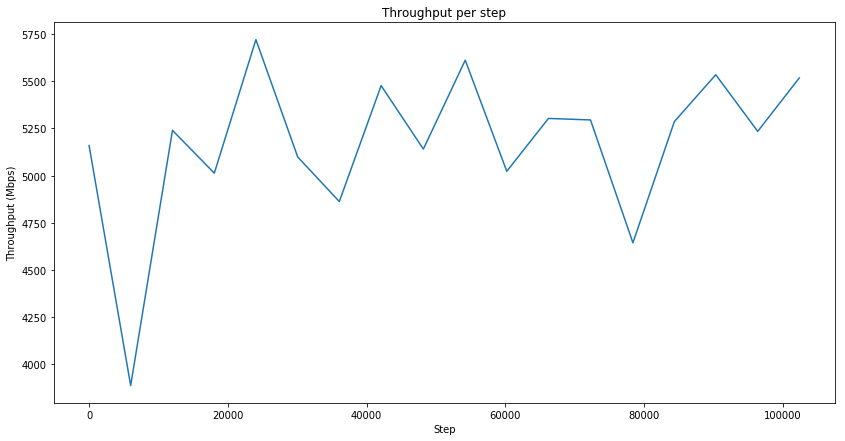

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(14, 7)

plt.plot(steps,2*1024*1024*8 / throughput)
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Step")
plt.title("Throughput per step")

In [24]:
validate.idxmin()

0    0
1    4
dtype: int64

In [25]:
2*8*1024*1024/validate[1][4]

5720.2867501607361

In [26]:
validate[0][4]

24050

In [36]:
%%bash
rm /App/logs/client.logs
echo 24050 > /App/output/train_0/validate_24050.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 0 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_0/validate_24050.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.
*** Error setting resource li

In [28]:
%%bash
rm /App/logs/client.logs
echo 0 > /App/output/train_0/validate_rtt.csv
for i in $(seq 1 200)
do
cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 0  --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_0/validate_rtt.csv
done

*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/legacyschtest.py", line 81, in <module>
    do_training(args.sch, args.rtt, args.tcp_background)
  File "/App/mininettest/legacyschtest.py", line 70, in do_training
    exec_test(server_cmd, rtt, tcp_b)
  File "/App/mininettest/legacyschtest.py", line 26, in exec_test
    network = setup()
  File "/App/mininettest/legacyschtest.py", line 20, in setup
    net = setup_environment()
  File "/App/mininettest/basicTopo.py", line 8, in setup_environment
    net = Mininet(topo=DoubleConnTopo(), switch=OVSBridge, controller=None)
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 172, in __init__
    self.build()
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 444, in build
    self.buildFromTopo( self.topo )
  File "/usr/lib/python2.7/dist-packages/mininet/net.py", line 431, in buildFromTopo
    self.addLink( **params )
  File "/usr/l

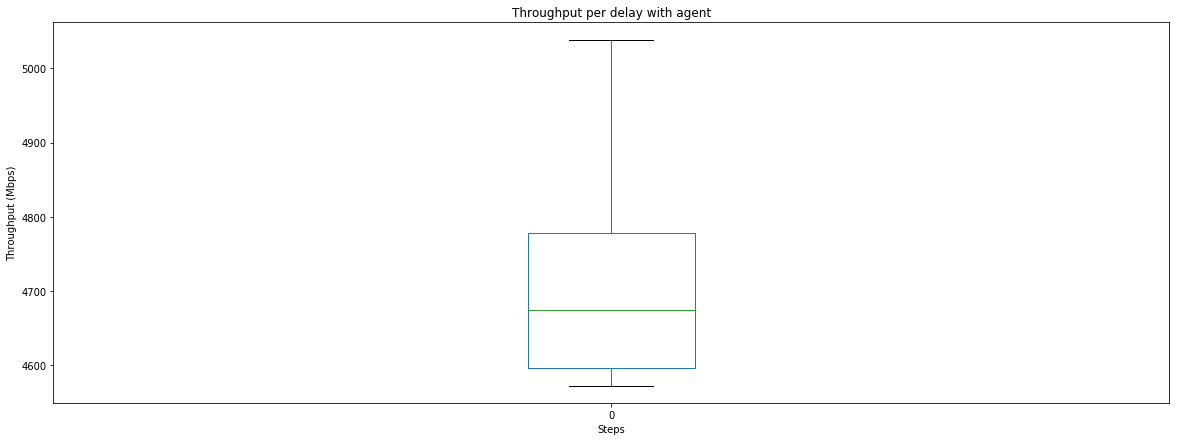

In [29]:
import pandas


rtt_sch = pandas.read_csv("/App/output/train_0/validate_rtt.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)


(2*8 * 1024 * 1024 / rtt_sch).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

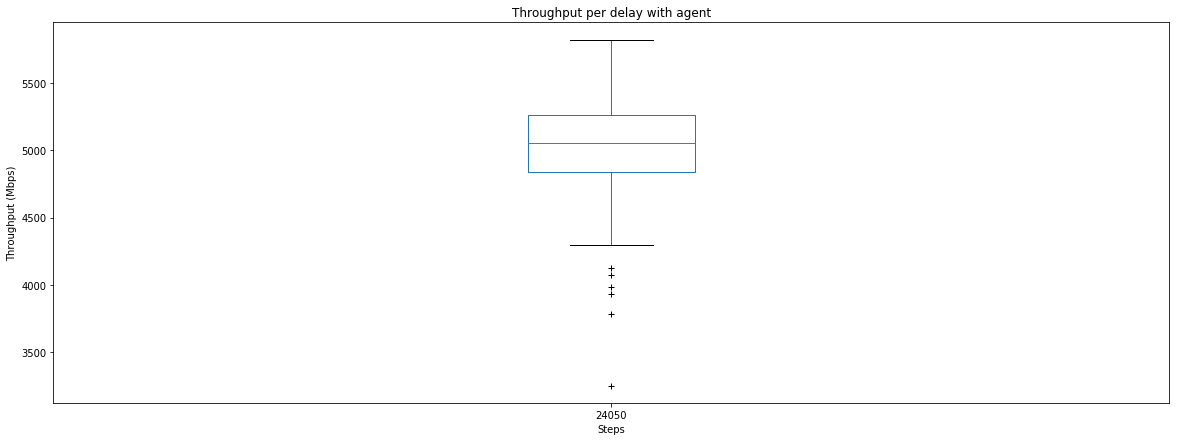

In [37]:
rtt_24050= pandas.read_csv("/App/output/train_0/validate_24050.csv")
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)
(2*8 * 1024 * 1024 / rtt_24050).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [38]:
(2*8 * 1024 * 1024 / rtt_24050).median()

24050    5055.251059
dtype: float64

In [39]:
(2*8 * 1024 * 1024 / rtt_24050).mean()

24050    5012.454448
dtype: float64

In [33]:
(2*8 * 1024 * 1024 / rtt_sch).median()

0    4674.234141
dtype: float64

In [34]:
(2*8 * 1024 * 1024 / rtt_sch).mean()

0    4723.472845
dtype: float64